### Linear Regression – Stackloss
- Read the stackloss dataset from stackloss.csv.
- Get a summary of numerical features
- Get a matrix of correlation coefficients between the variables
- Draw a matrix of scatterplots.
- Which input variables correlate the most strongly with stackloss?
- Build a linear regression for stackloss in terms of the other (input) variables.
- Print out the interface and the coefficients of the input variables.
- For new input data - newData = [[72, 20, 85]], make a prediction for the stackloss.

In [24]:
from statistics import LinearRegression

import pandas as pd
from pandas.plotting import scatter_matrix

df = pd.read_csv("../../data/stackloss.csv")

In [21]:
# Summary
print(df.head())
print(df.describe())
print(df.shape)

   AirFlow  WaterTemp  AcidConc  StackLoss
0       80         27        89         42
1       80         27        88         37
2       75         25        90         37
3       62         24        87         28
4       62         22        87         18
         AirFlow  WaterTemp   AcidConc  StackLoss
count  21.000000  21.000000  21.000000  21.000000
mean   60.428571  21.095238  86.285714  17.523810
std     9.168268   3.160771   5.358571  10.171623
min    50.000000  17.000000  72.000000   7.000000
25%    56.000000  18.000000  82.000000  11.000000
50%    58.000000  20.000000  87.000000  15.000000
75%    62.000000  24.000000  89.000000  19.000000
max    80.000000  27.000000  93.000000  42.000000
(21, 4)


In [ ]:
print("Matrix of correlation coefficients between the variables:", df.corr(), sep="\n")

#### Note: Higher correlation between StackLoss and both AcidConc and WaterConc. Low correlation with AcidConc

### Scatter plot

array([[<Axes: xlabel='AirFlow', ylabel='AirFlow'>,
        <Axes: xlabel='WaterTemp', ylabel='AirFlow'>,
        <Axes: xlabel='AcidConc', ylabel='AirFlow'>,
        <Axes: xlabel='StackLoss', ylabel='AirFlow'>],
       [<Axes: xlabel='AirFlow', ylabel='WaterTemp'>,
        <Axes: xlabel='WaterTemp', ylabel='WaterTemp'>,
        <Axes: xlabel='AcidConc', ylabel='WaterTemp'>,
        <Axes: xlabel='StackLoss', ylabel='WaterTemp'>],
       [<Axes: xlabel='AirFlow', ylabel='AcidConc'>,
        <Axes: xlabel='WaterTemp', ylabel='AcidConc'>,
        <Axes: xlabel='AcidConc', ylabel='AcidConc'>,
        <Axes: xlabel='StackLoss', ylabel='AcidConc'>],
       [<Axes: xlabel='AirFlow', ylabel='StackLoss'>,
        <Axes: xlabel='WaterTemp', ylabel='StackLoss'>,
        <Axes: xlabel='AcidConc', ylabel='StackLoss'>,
        <Axes: xlabel='StackLoss', ylabel='StackLoss'>]], dtype=object)

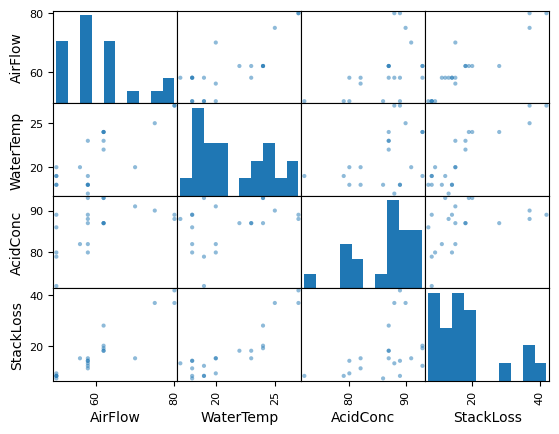

In [20]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

# Histograms of values
# df.hist()
# plt.show()
# plt.savefig('plots/p3stacklossHist.png')

scatter_matrix(df)

#### Note: We can see the good linear correlations with AitFlow and WaterTemp. Poor correlation with AcidConc.

#### Build a linear regression for stackloss in terms of the other (input) variables.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)


(15, 3)
(6, 3)
intercept: -36.69140840591728
slope: [ 0.81826835  1.20212439 -0.24889254]
R squared: 0.9013813070763419


#### Print out the interface and the coefficients of the input variables.

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R squared:', model.score(X,y))

#### For new input data - newData = [[72, 20, 85]], make a prediction for the stackloss.

In [32]:
newData = [[72, 20, 85]]

newDF = pd.DataFrame(newData,  columns = ['AirFlow', 'WaterTemp', 'AcidConc'])
print(newDF)
y_hat = model.predict(newDF)
print('y_hat', y_hat)

   AirFlow  WaterTemp  AcidConc
0       72         20        85
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
y_hat [25.11053454]
